In [1]:
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd


In [2]:
raw_data = Path('/Volumes/krauss/Lisa/GMR/Array/SpecialBox/Cuthbert/250716/results_FULL/communicating_results.csv')

In [3]:
df = pd.read_csv(raw_data)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.head()

,ROI-label,Analysis-method,amplitude,mu,sigma,offset,error
timestamp,,,,,,,
2025-07-16 13:58:43.736217,001A_N,gaussian,172.004,111.062,58.503,1.160,11.725
2025-07-16 13:58:43.736217,001A_S,gaussian,148.453,108.339,47.541,0.068,11.065
2025-07-16 13:58:43.736217,002A_N,gaussian,132.637,99.444,55.902,-2.217,12.209
2025-07-16 13:58:43.736217,002A_S,gaussian,118.533,84.231,50.739,-1.401,14.133
2025-07-16 13:58:43.736217,003A_N,gaussian,175.866,84.851,47.233,0.526,15.396


In [4]:
rois = df["ROI-label"].unique()
rois = sorted(list(set([roi[:-2] for roi in rois])))
print(rois)
print(len(rois))

['001A', '001B', '002A', '002B', '003A', '003B', '004A', '004B', '005A', '005B', '006A', '006B', '007A', '007B', '011A', '011B', '012A', '012B', '013A', '013B', '014A', '014B', '015A', '015B', '016A', '016B', '017A', '017B', '018A', '021A', '021B', '022A', '022B', '023A', '023B', '024A', '024B', '025A', '025B', '026A', '026B', '027A', '027B', '031A', '031B', '032A', '032B', '033A', '033B', '034A', '034B', '035A', '035B', '036A', '036B', '037A', '037B', '038A', '040A', '040B', '041A', '041B', '042A', '042B', '043A', '043B', '044A', '044B', '045A', '045B', '046A', '046B', '047A', '047B', '050A', '050B', '051A', '051B', '052A', '052B', '053A', '053B', '054A', '054B', '055A', '055B', '056A', '056B', '057A', '057B', '058A', '060A', '060B', '061A', '061B', '062A', '062B', '063A', '063B', '064A', '064B', '065A', '065B', '066A', '066B', '067A', '067B', '070A', '070B', '071A', '071B', '072A', '072B', '073A', '073B', '074A', '074B', '075A', '075B', '076A', '076B', '077A', '077B', '078A', '080A',

In [5]:
new_cols = {}
suffix = ['_N', '_S']
final_index = None

for roi in rois:
    df_N = df[df["ROI-label"] == f"{roi}{suffix[0]}"]["mu"]
    df_S = df[df["ROI-label"] == f"{roi}{suffix[1]}"]["mu"]
    if not df_N.empty and not df_S.empty:
        combined_series = df_N.reset_index(drop=True) + df_S.reset_index(drop=True)
        new_cols[roi] = combined_series

        if final_index is None:
            final_index = df_N.index

comb_df = pd.DataFrame(new_cols)

if final_index is not None:
    comb_df.index = final_index

comb_df.head()

,001A,001B,002A,002B,003A,003B,004A,004B,005A,005B,...,193B,194A,194B,195A,195B,196A,196B,197A,197B,198A
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-07-16 13:58:43.736217,219.401,69.603,183.675,66.606,157.882,71.270,134.863,53.322,156.078,58.503,...,79.732,196.886,82.333,172.859,87.012,197.630,85.905,189.357,80.291,213.162
2025-07-16 13:58:58.313317,221.908,70.037,186.102,67.032,157.590,64.897,135.030,52.784,155.202,56.925,...,79.712,196.380,82.229,172.851,86.454,198.327,85.493,187.875,80.355,212.871
2025-07-16 13:59:17.388782,222.604,69.370,185.374,64.707,159.047,72.213,135.240,53.051,155.096,56.830,...,79.811,196.067,83.170,172.606,86.109,197.228,84.597,188.986,78.766,212.459
2025-07-16 13:59:36.405350,223.290,69.753,183.359,66.763,154.726,71.319,135.368,52.881,154.914,57.894,...,79.549,196.701,82.398,172.454,86.329,197.824,84.826,189.322,80.520,212.700
2025-07-16 13:59:55.196278,222.984,68.970,186.782,66.357,157.359,70.683,135.391,52.337,155.362,59.038,...,79.943,196.301,82.592,172.923,86.413,197.049,85.098,188.669,78.835,213.556


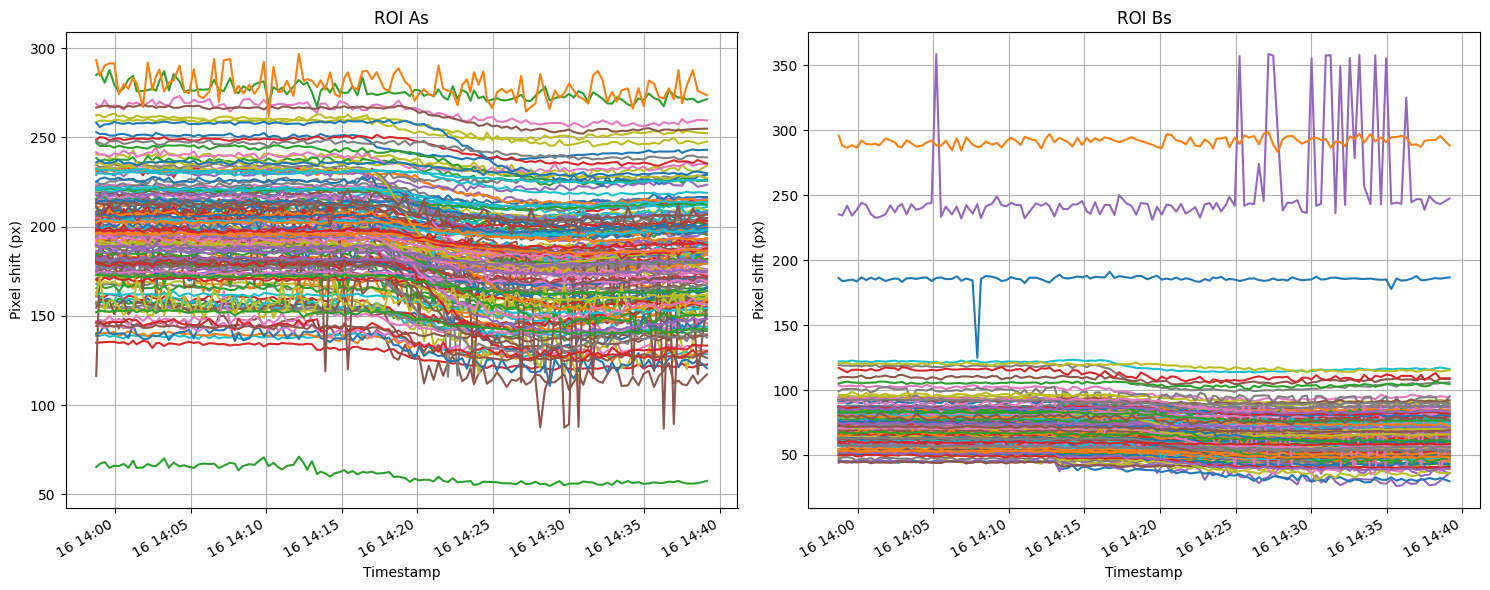

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

comb_df.loc[:, comb_df.columns.str.contains('A')].plot(
    kind='line',
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

comb_df.loc[:, comb_df.columns.str.contains('B')].plot(
    kind='line',
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

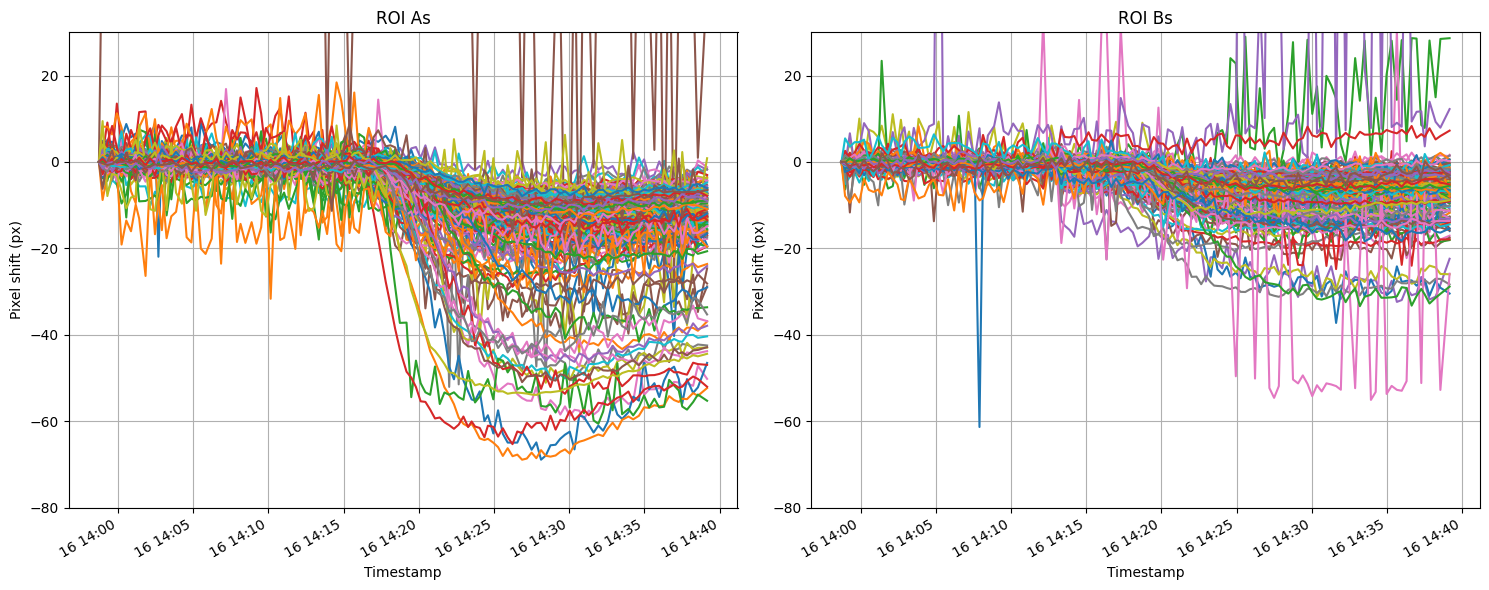

In [11]:
y_limits = (-80, 30)
normalized_df = comb_df - comb_df.iloc[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

normalized_df.loc[:, normalized_df.columns.str.contains('A')].plot(
    kind='line',
    ylim=y_limits,
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

normalized_df.loc[:, normalized_df.columns.str.contains('B')].plot(
    kind='line',
    ylim=y_limits,
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

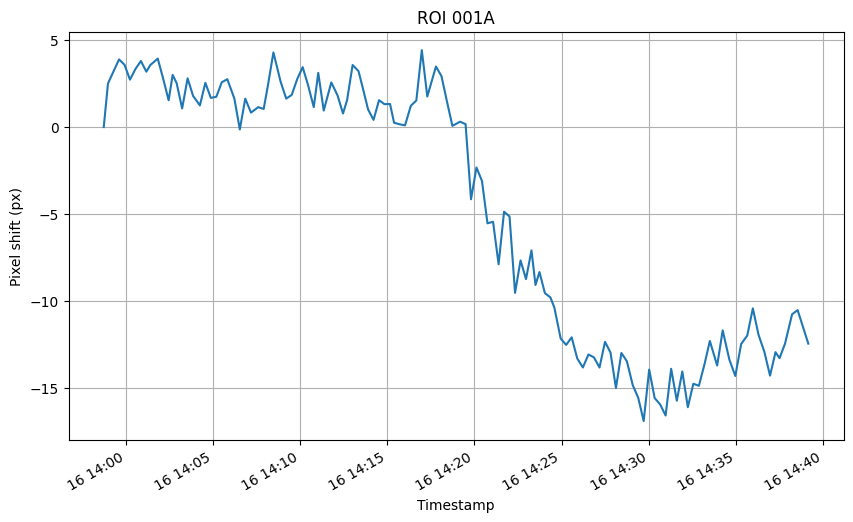

In [8]:
label = "001A"

normalized_df[label].plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

plt.grid(True) # Add a grid for better readability
plt.show()

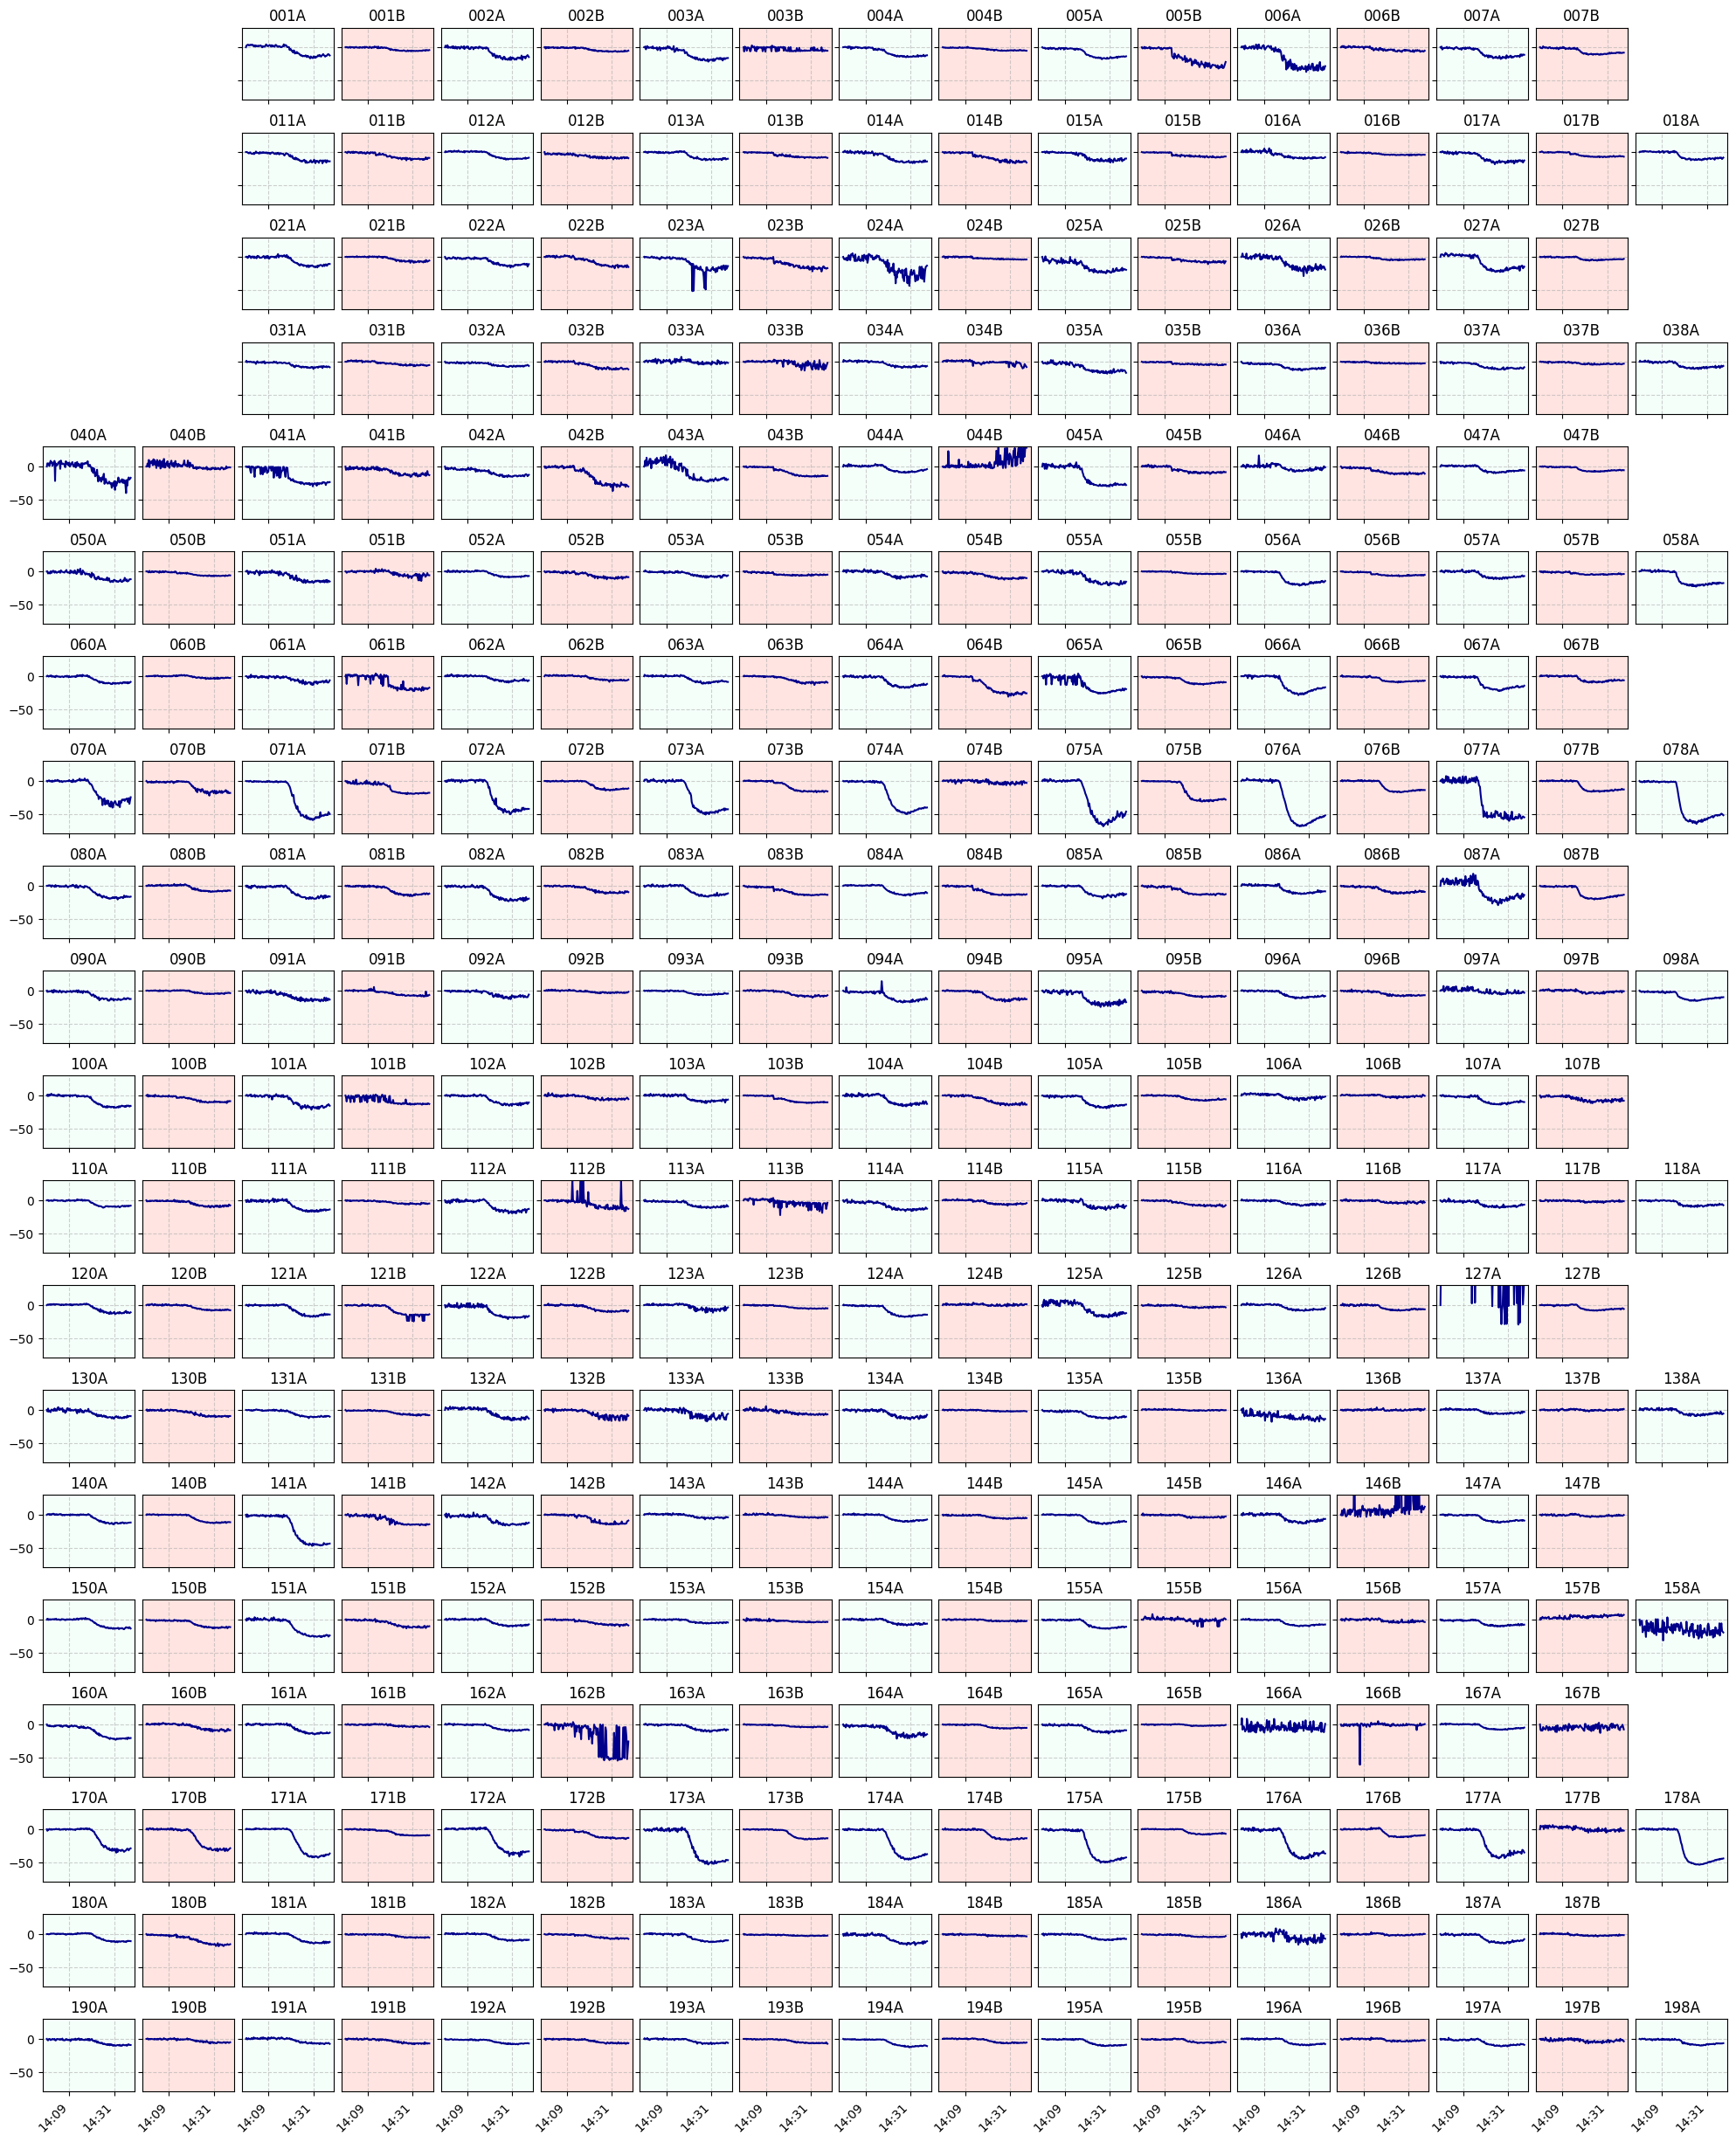

In [13]:
roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))

fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(20, 30),
                       sharex=True,
                       sharey=True)

# fig.supxlabel("Timestamp")
# fig.supylabel("Pixel shift (px)")

plt.ylim(y_limits[0], y_limits[1])
ax[0, 0].xaxis.set_major_locator(mticker.MaxNLocator(nbins=3))
time_formatter = mdates.DateFormatter('%H:%M')
ax[-1, 0].xaxis.set_major_formatter(time_formatter)

type_colours = {'A': 'mintcream', 'B': 'mistyrose'}
# type_colours = {'A': 'honeydew', 'B': 'seashell'}
# type_colours = {'A': 'honeydew', 'B': 'snow'}
ax = ax.flatten()

# Turn off all axes
for a in ax:
    a.axis('off')

x_values = normalized_df.index
count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        type_part = roi_label[-1]
        try:
            y_values = normalized_df[roi_label].values
            ax[count].plot(x_values, y_values, color='darkblue')
            ax[count].axis('on')
            ax[count].set_facecolor(type_colours.get(type_part, 'white'))
            ax[count].set_title(roi_label)
            ax[count].grid(True, linestyle='--', alpha=0.6)
        except KeyError:
            pass
        count += 1

plt.tight_layout()
fig.subplots_adjust(wspace=0.08, hspace=0.45)
fig.autofmt_xdate(rotation=45)
plt.savefig(Path(raw_data.parent, "Array_data.png"), dpi=300)

In [80]:
plt.savefig("Array_data.png", dpi=300)

<Figure size 640x480 with 0 Axes>